Note: this is worthless, because we have no info on the magnet polarity for the event.

In [1]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import pathlib
import gc

In [2]:
preselectionCuts = False
save_plots = True

# Import data

In [3]:
inputMC = '~/data/LHCbMC_2016-2017-2018_MagUpDown_Lb2JPsiL_Ttracks_v12.h5'

In [4]:
tickMC = time.perf_counter()
df_reco = pd.read_hdf(inputMC, key='LHCbMC_Lb')
tockMC = time.perf_counter()
print(f"Monte Carlo imported in {tockMC - tickMC:0.4f} seconds.")

Monte Carlo imported in 0.8982 seconds.


In [5]:
tick = time.perf_counter()
df_truth = pd.read_hdf(inputMC, key='LHCbMCTruth_Lb')
tock = time.perf_counter()
print(f"Monte Carlo Truth imported in {tock - tick:0.4f} seconds.")

Monte Carlo Truth imported in 13.6360 seconds.


In [6]:
tick = time.perf_counter()
df_MC = pd.merge(df_truth, df_reco.loc[df_reco['MC_key'] >= 0, :].drop('TrackType', axis='columns').groupby('MC_key').first(), how='left', on='MC_key')
tock = time.perf_counter()
print(f"Monte Carlo merged in {tock - tick:0.4f} seconds.")

Monte Carlo merged in 148.4956 seconds.


In [7]:
df_MC = df_MC[(df_MC['Rec_key'] >= 0) & (df_MC['TrackType'] == 'T')]
df_MC

,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,DTF_FixJPsiLambda_PIDSubs_pim_PZ,DTF_FixJPsiLambda_PIDSubs_p_PX,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ
MC_key,,,,,,,,,,,,,,,,,,,,,
0,0.9512,-0.1669,26.401600,343.742889,-192.429398,4751.548828,2031.640015,-1218.119995,29336.890625,445.510010,...,32905.289062,292.816681,-186.566345,5411.963379,-804.469727,-535.944397,22858.960938,1438.071777,1619.347290,23634.302734
29,0.8237,-0.2123,3.514200,140.238602,325.837311,7463.102539,367.250000,1035.959961,24602.169922,174.279999,...,25203.607422,171.069519,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375
69,-0.4798,-0.7758,18.706800,-785.810974,-591.072998,5157.507812,-5172.310059,-3904.530029,34147.730469,-470.119995,...,35743.000000,-364.151062,-323.442810,2628.927246,4.108163,-790.314697,5651.807129,-5579.078613,-431.151581,23151.667969
119,1.6829,-2.2522,-36.520901,94.709503,-270.525391,3823.881348,5635.350098,-15984.469727,230495.453125,604.909973,...,188402.296875,413.837830,-1702.511353,24506.517578,8712.822266,-18033.572266,231397.500000,336.531647,-3496.248779,45100.238281
202,2.2347,-3.0136,-3.515400,-41.785000,-495.398499,2890.112793,-144.789993,-1430.229980,8650.469727,-27.309999,...,8376.690430,39.732117,-514.345398,2560.247559,2766.051025,-6544.098633,37503.421875,4405.509766,-5917.182129,27155.025391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921673,0.9741,0.2091,-11.659000,294.090698,39.875000,7125.287109,2412.750000,405.109985,60216.011719,395.200012,...,57967.937500,369.589996,-18.306223,7767.518555,1504.345581,715.472656,49351.718750,-112.221489,2933.706299,37641.914062
8921702,-0.5103,1.2180,21.928400,-148.940399,123.715599,7319.557129,-1238.500000,978.909973,57653.351562,-45.599998,...,109052.914062,92.123260,-50.586430,-2812.631592,-3547.666504,1885.741577,33505.289062,-1337.816284,1466.083374,45027.328125
8921772,0.1275,-0.0589,25.113001,-123.851601,-28.034100,2985.664307,-6471.830078,-1487.530029,153226.906250,-561.440002,...,164034.843750,-634.271484,-133.646973,15975.192383,-3526.683594,-343.335175,44636.988281,-3534.635254,-3121.734619,91762.195312


In [8]:
## Cleanup
try:
    del(df_truth)
except NameError:
    pass

try:
    del(df_reco)
except NameError:
    pass

gc.collect()

0

In [9]:
def MomentumModulus(px, py, pz):
    return np.sqrt(px**2 + py**2 + pz**2)

def TransverseMomentumModulus(px, py):
    return np.sqrt(px**2 + py**2)

In [10]:
if preselectionCuts:
    JPsi1SPDGMass = 3096.900

    PionPCuts = (MomentumModulus(df_MC['pim_PX'], df_MC['pim_PY'], df_MC['pim_PZ']) > 2000) & (MomentumModulus(df_MC['pim_PX'], df_MC['pim_PY'], df_MC['pim_PZ']) < 5e5)
    ProtonPCuts = (MomentumModulus(df_MC['p_PX'], df_MC['p_PY'], df_MC['p_PZ']) > 10000) & (MomentumModulus(df_MC['p_PX'], df_MC['p_PY'], df_MC['p_PZ']) < 5e5)
    ProtonPTCuts = TransverseMomentumModulus(df_MC['p_PX'], df_MC['p_PY']) > 400
    LambdaMCuts = (df_MC['L_M'] > 600) & (df_MC['L_M'] < 1500)
    LambdaMMCuts = df_MC['L_MM'] < 1500
    LambdaZCuts = (df_MC['L_ENDVERTEX_Z'] > 5500) & (df_MC['L_ENDVERTEX_Z'] < 8500)
    LambdaDiraCuts = (df_MC['L_BPVDIRA'] > 0.9999)
    LambdaBPVIPCHI2Cuts = df_MC['L_BPVIPCHI2'] < 200
    LambdaBPVVDCHI2Cuts = df_MC['L_BPVVDCHI2'] < 2e7
    LambdaChi2Cuts = df_MC['L_VFASPF_CHI2_VDOF'] < 750
    JPsiMCuts = abs(df_MC['Jpsi_M'] - JPsi1SPDGMass) < 90
    LambdaPTCuts = TransverseMomentumModulus(df_MC['L_PX'], df_MC['L_PY']) > 450
    LambdabMCuts = (df_MC['Lb_M'] < 8500)
    LambdabDiraCuts = abs(df_MC['Lb_BPVDIRA']) > 0.99
    LambdabBPVIPCHI2Cuts = df_MC['Lb_BPVIPCHI2'] < 1750
    LambdabChi2Cuts = df_MC['Lb_VFASPF_CHI2_VDOF'] < 150

    #DTFCuts = (df_MC['DTF_FixJPsiLambda_status'] == 'Success')


    df_MC = df_MC.loc[
        PionPCuts &
        ProtonPCuts &
        ProtonPTCuts &
        LambdaMCuts &
        LambdaMMCuts &
        LambdaZCuts &
        LambdaDiraCuts &
        LambdaBPVIPCHI2Cuts &
        LambdaBPVVDCHI2Cuts &
        LambdaChi2Cuts &
        JPsiMCuts &
        LambdaPTCuts &
        LambdabMCuts &
        LambdabDiraCuts &
        LambdabBPVIPCHI2Cuts &
        LambdabChi2Cuts
    ]

In [11]:
## This only contains proton-pim decays
df_lambdab = df_MC.loc[df_MC['p_ID'] == 2212]
## And this only contains antiproton-pip decays
df_antilambdab = df_MC.loc[df_MC['p_ID'] == -2212]

# Search for asymmetries

## Plot settings

In [12]:
## Create plots directory, if missing
plotsDirectory = str(pathlib.Path.home()) + '/vertex-reconstruction-studies/plots/decay_reconsutrction_asymmetry_analysis/'
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

## Colors
fullColor = 'grey'
matterColor = 'tab:red'
antimatterColor = 'tab:green'

In [13]:
def PlotSingleHistogram(
    dataCategory,
    feature,
    featureAxisLabel,
    featurePlotTitle,
    scale,
    binning,
    boundaries,
    scientificNotationLabel
):
    if dataCategory == 'full':
        variables = df_MC[feature]
        subtitle = "($\Lambda_b$ + anti-$\Lambda_b$ decays)"
        customColor = fullColor
        filePrefix = 'all'
    elif dataCategory == 'matter':
        variables = df_lambdab[feature]
        subtitle = "(Only $\Lambda_b$ decays)"
        customColor = matterColor
        filePrefix = 'matter'
    elif dataCategory == 'antimatter':
        variables = df_antilambdab[feature]
        subtitle = "(Only anti-$\Lambda_b$ decays)"
        customColor = antimatterColor
        filePrefix = 'antimatter'
    
    plt.hist(variables,
             bins=binning,
             range=boundaries,
             histtype='stepfilled',
             edgecolor=customColor,
             color=mcolors.to_rgba(customColor, alpha=0.1)
    )
    plt.grid()
    plt.xlabel(featureAxisLabel)
    plt.title(featurePlotTitle + "\n" + subtitle)
    plt.yscale(scale)
    plt.ylabel("Events")
    if scientificNotationLabel:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    if save_plots:
        plt.savefig(plotsDirectory + filePrefix + "_" + feature + '.pdf', bbox_inches='tight')
    plt.show()
    
def PlotOverlappingHistograms(
    feature,
    featureAxisLabel,
    featurePlotTitle,
    scale,
    binning,
    boundaries,
    scientificNotationLabel
):   
    plt.hist(df_lambdab[feature],
             bins=binning,
             range=boundaries,
             label="$\Lambda_b$ decays",
             histtype='stepfilled',
             edgecolor=matterColor,
             color=mcolors.to_rgba(matterColor, alpha=0.05),
             density=False
    )
    
    plt.hist(df_antilambdab[feature],
             bins=binning,
             range=boundaries,
             label="Anti-$\Lambda_b$ decays",
             histtype='stepfilled',
             edgecolor=antimatterColor,
             color=mcolors.to_rgba(antimatterColor, alpha=0.05),
             density=False
    )    
    
    plt.grid()
    plt.xlabel(featureAxisLabel)
    plt.title(featurePlotTitle + "\n" + "($\Lambda_b$ vs. anti-$\Lambda_b$ decays)")
    plt.yscale(scale)
    plt.ylabel("Events")
    plt.legend()
    if scientificNotationLabel:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    if save_plots:
        plt.savefig(plotsDirectory + "matter-vs-antimatter_" + feature + '.pdf', bbox_inches='tight')
    plt.show()

## Proton momentum

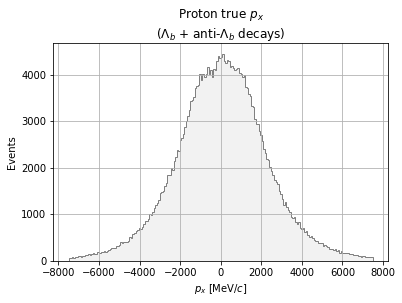

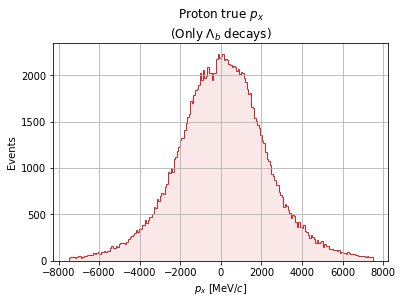

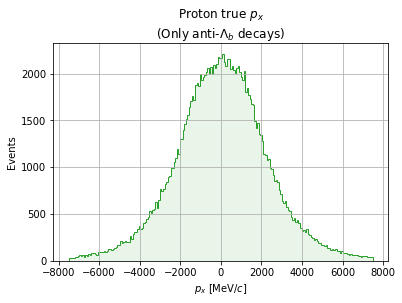

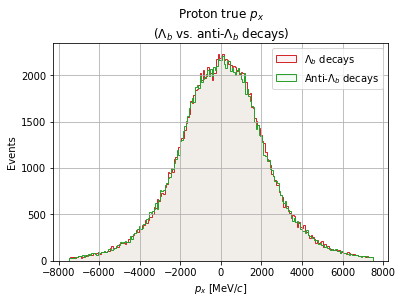

In [14]:
plotArgs = {
    "feature": 'MCTRUTH_p_PX',
    "featureAxisLabel": "$p_x$ [MeV/$c$]",
    "featurePlotTitle": "Proton true $p_x$",
    "scale": "linear",
    "binning": 200,
    "boundaries": (-7500,7500),
    "scientificNotationLabel": False    
}

for dataset in ['full', 'matter', 'antimatter']:
    PlotSingleHistogram(dataset, **plotArgs)
PlotOverlappingHistograms(**plotArgs)

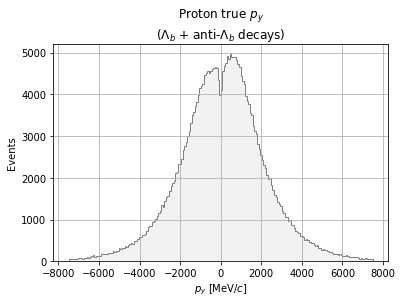

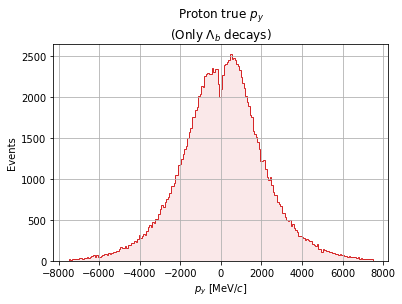

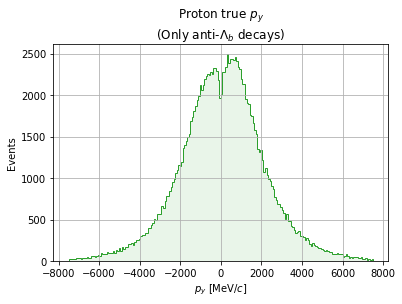

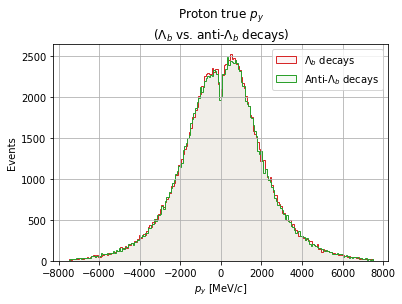

In [15]:
plotArgs = {
    "feature": 'MCTRUTH_p_PY',
    "featureAxisLabel": "$p_y$ [MeV/$c$]",
    "featurePlotTitle": "Proton true $p_y$",
    "scale": "linear",
    "binning": 200,
    "boundaries": (-7500,7500),
    "scientificNotationLabel": False    
}

for dataset in ['full', 'matter', 'antimatter']:
    PlotSingleHistogram(dataset, **plotArgs)
PlotOverlappingHistograms(**plotArgs)

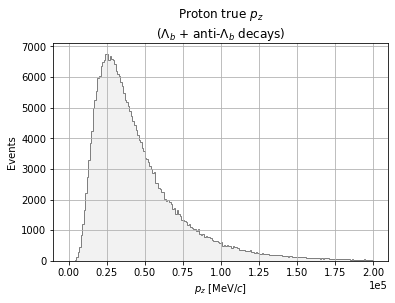

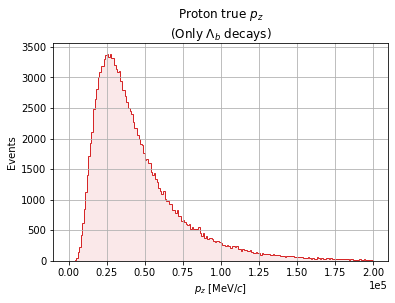

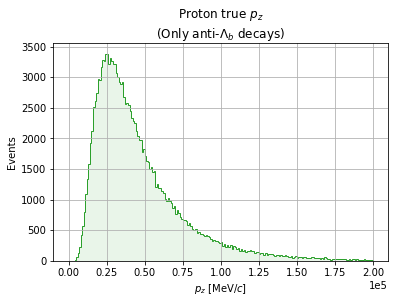

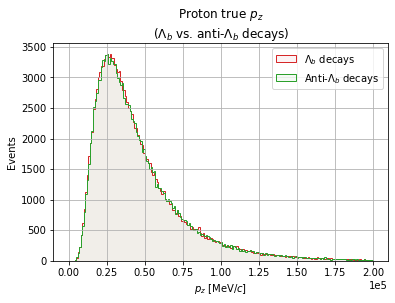

In [16]:
plotArgs = {
    "feature": 'MCTRUTH_p_PZ',
    "featureAxisLabel": "$p_z$ [MeV/$c$]",
    "featurePlotTitle": "Proton true $p_z$",
    "scale": "linear",
    "binning": 200,
    "boundaries": (0,2e5),
    "scientificNotationLabel": True    
}

for dataset in ['full', 'matter', 'antimatter']:
    PlotSingleHistogram(dataset, **plotArgs)
PlotOverlappingHistograms(**plotArgs)

## Pion momentum

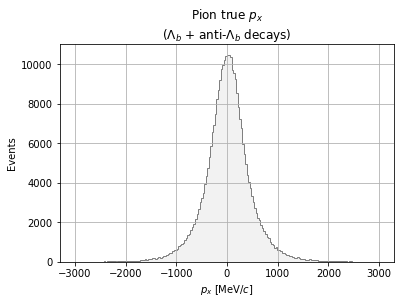

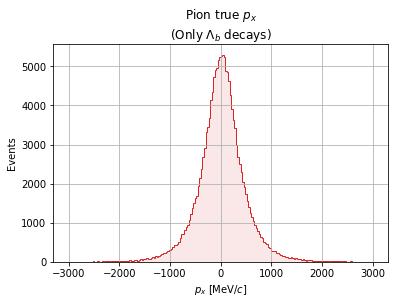

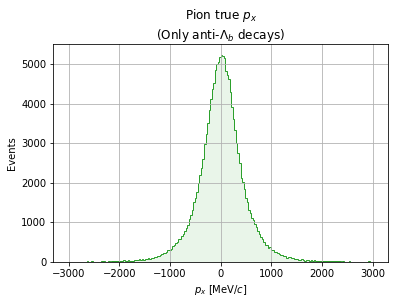

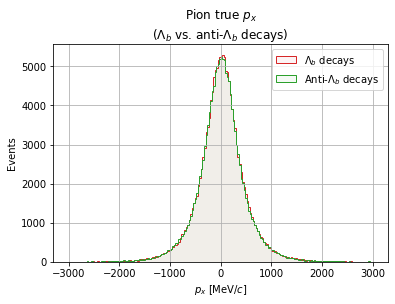

In [17]:
plotArgs = {
    "feature": 'MCTRUTH_pim_PX',
    "featureAxisLabel": "$p_x$ [MeV/$c$]",
    "featurePlotTitle": "Pion true $p_x$",
    "scale": "linear",
    "binning": 200,
    "boundaries": (-3000,3000),
    "scientificNotationLabel": False    
}

for dataset in ['full', 'matter', 'antimatter']:
    PlotSingleHistogram(dataset, **plotArgs)
PlotOverlappingHistograms(**plotArgs)

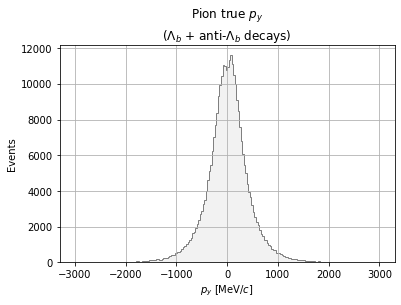

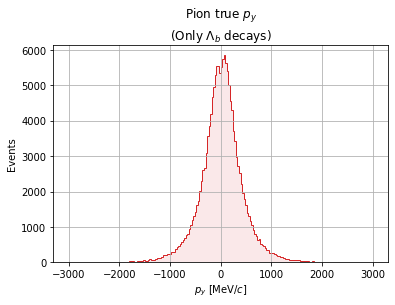

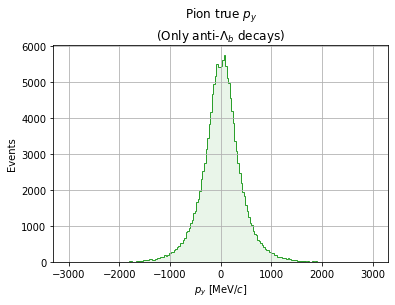

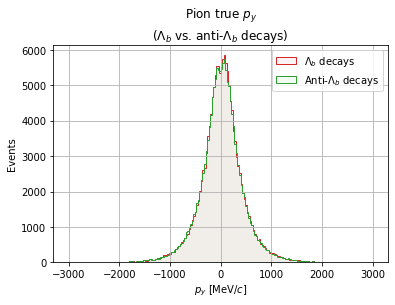

In [18]:
plotArgs = {
    "feature": 'MCTRUTH_pim_PY',
    "featureAxisLabel": "$p_y$ [MeV/$c$]",
    "featurePlotTitle": "Pion true $p_y$",
    "scale": "linear",
    "binning": 200,
    "boundaries": (-3000,3000),
    "scientificNotationLabel": False    
}

for dataset in ['full', 'matter', 'antimatter']:
    PlotSingleHistogram(dataset, **plotArgs)
PlotOverlappingHistograms(**plotArgs)

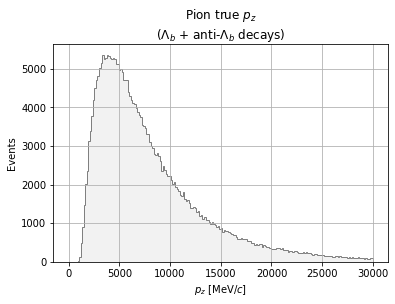

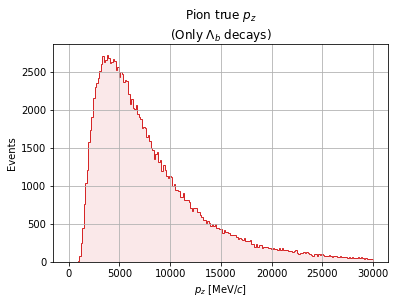

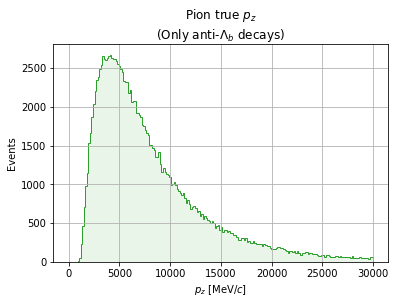

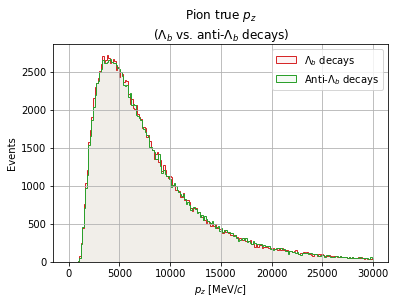

In [19]:
plotArgs = {
    "feature": 'MCTRUTH_pim_PZ',
    "featureAxisLabel": "$p_z$ [MeV/$c$]",
    "featurePlotTitle": "Pion true $p_z$",
    "scale": "linear",
    "binning": 200,
    "boundaries": (0,3e4),
    "scientificNotationLabel": False    
}

for dataset in ['full', 'matter', 'antimatter']:
    PlotSingleHistogram(dataset, **plotArgs)
PlotOverlappingHistograms(**plotArgs)